# Bias correction of numerical prediction model temperature forecast

Predicting the Min and Max temperature of next day

Importing the required libraries as shown below

Data Analysing

Data Visualization

Exploratory data analysis(EDA)

Data Preprocessing

Model Building

Cross Validation and Prediction

Grid Search

Saving the model with joblib

Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

C:\Users\Suhas\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
dat=pd.read_csv('bias.csv')
dat

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Data Description

1. station - used weather station number: 1 to 25
    
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8

In [3]:
#columns of dataset

dat.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [4]:
#data types of columns

dat.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [5]:
#replacing null values with NaN

da=dat.replace(' ',np.NaN)

In [6]:
#Finding null values

da.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [7]:
#Finding the null values and data types of the datset

da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [8]:
#dropping the  nan values

data=da.dropna()

In [9]:
#Finding the null values and data types of the datset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [10]:
# Finding the un-unique values in each and every column

data.nunique()

station               25
Date                 307
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
dtype: int64

# Data Visualization

Univariate Plot

31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
20.1      1
20.4      1
37.1      1
37.6      1
21.2      1
Name: Present_Tmax, Length: 167, dtype: int64


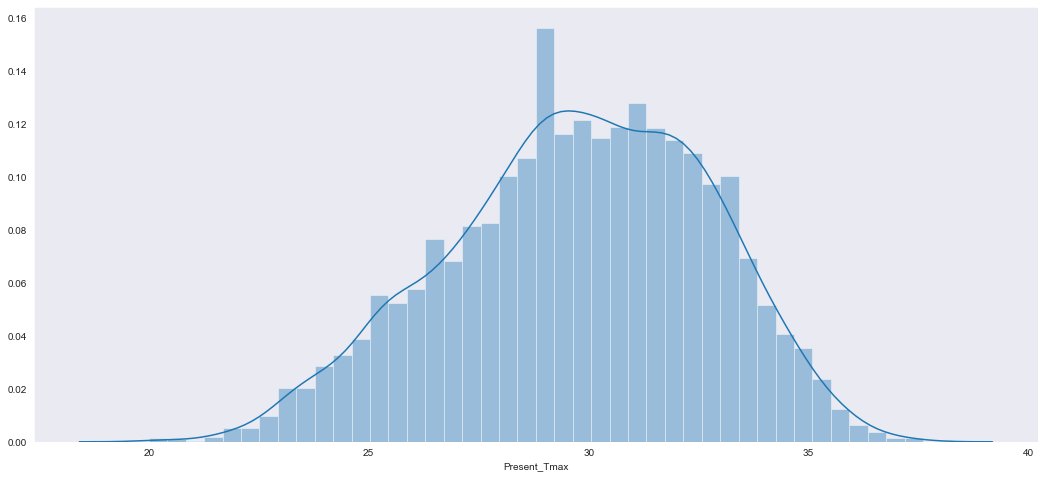

In [11]:
plt.figure(figsize=(18,8))
sb.set_style('dark')
sb.distplot(data['Present_Tmax'])
print(data['Present_Tmax'].value_counts())

24.0    160
23.8    153
23.5    143
23.1    143
23.3    140
       ... 
14.1      1
14.2      1
29.7      1
29.9      1
11.3      1
Name: Present_Tmin, Length: 155, dtype: int64


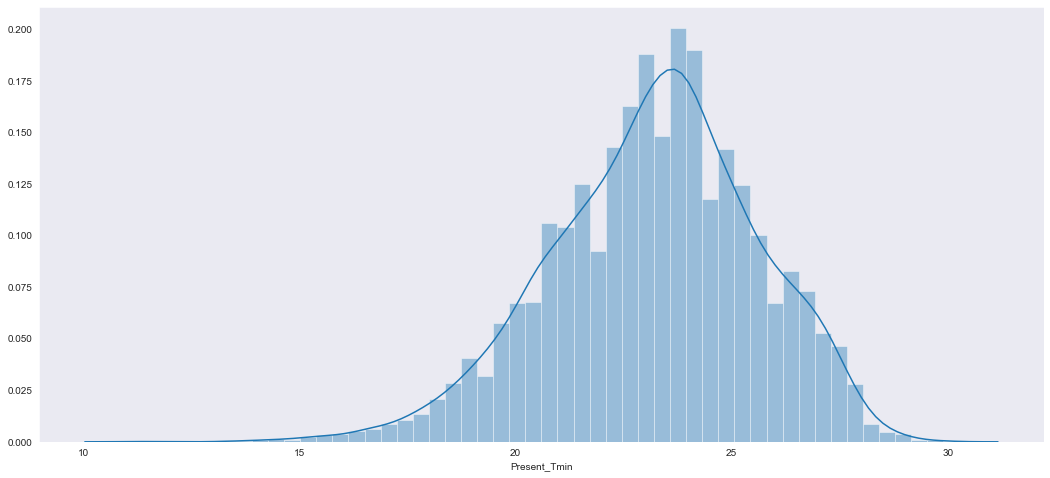

In [12]:
plt.figure(figsize=(18,8))
sb.set_style('dark')
sb.distplot(data['Present_Tmin'])
print(data['Present_Tmin'].value_counts())

51.810596    2
77.030350    2
71.658089    2
43.947876    1
78.708603    1
            ..
44.005089    1
58.655628    1
58.761993    1
42.186558    1
71.359451    1
Name: LDAPS_RHmin, Length: 7585, dtype: int64


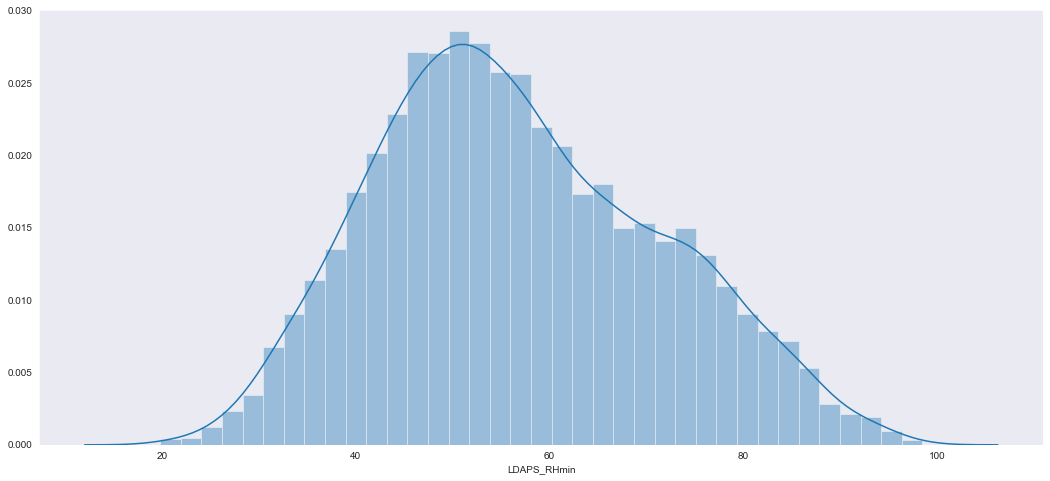

In [13]:
plt.figure(figsize=(18,8))
sb.set_style('dark')
sb.distplot(data['LDAPS_RHmin'])
print(data['LDAPS_RHmin'].value_counts())

91.776146    2
88.938194    2
94.795967    2
85.863731    2
88.876610    2
            ..
86.014893    1
89.609070    1
88.095352    1
72.922852    1
83.073624    1
Name: LDAPS_RHmax, Length: 7577, dtype: int64


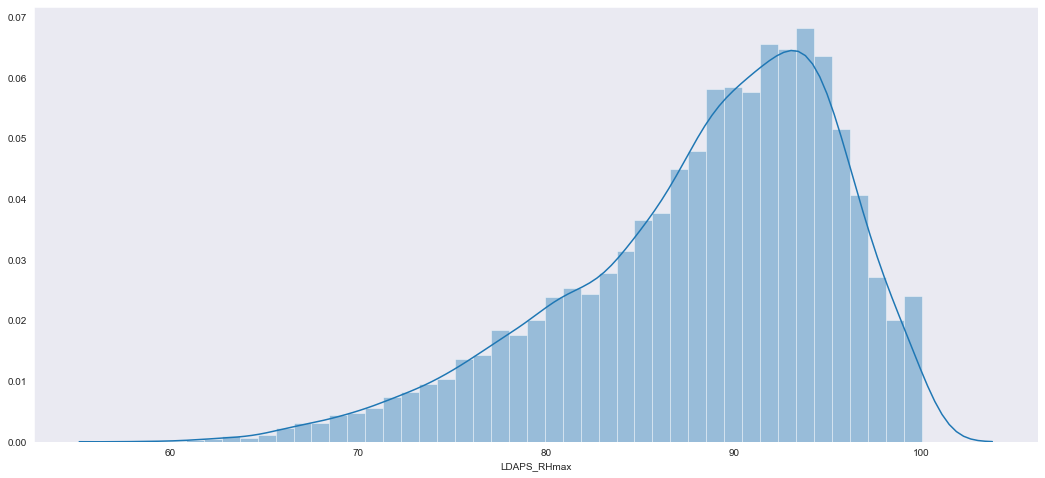

In [14]:
plt.figure(figsize=(18,8))
sb.set_style('dark')
sb.distplot(data['LDAPS_RHmax'])
print(data['LDAPS_RHmax'].value_counts())

29.732836    1
28.174952    1
30.574987    1
27.753920    1
32.762753    1
            ..
28.761418    1
28.577678    1
32.972568    1
31.208222    1
27.149571    1
Name: LDAPS_Tmax_lapse, Length: 7588, dtype: int64


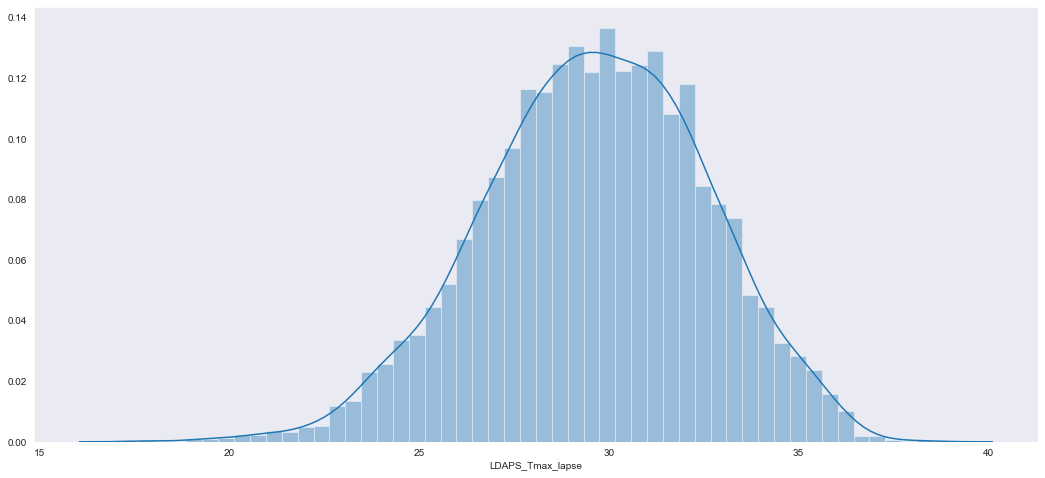

In [15]:
plt.figure(figsize=(18,8))
sb.set_style('dark')
sb.distplot(data['LDAPS_Tmax_lapse'])
print(data['LDAPS_Tmax_lapse'].value_counts())

21.797430    1
21.870334    1
16.350055    1
25.728491    1
24.719108    1
            ..
20.861831    1
22.521587    1
25.165670    1
16.640794    1
23.197572    1
Name: LDAPS_Tmin_lapse, Length: 7588, dtype: int64


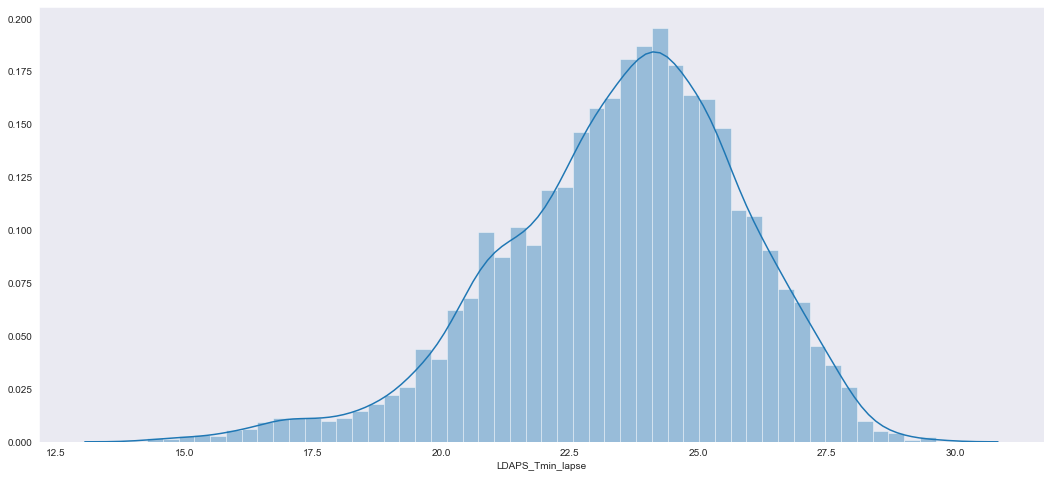

In [16]:
plt.figure(figsize=(18,8))
sb.set_style('dark')
sb.distplot(data['LDAPS_Tmin_lapse'])
print(data['LDAPS_Tmin_lapse'].value_counts())

4.633030     1
6.842240     1
6.796009     1
10.157699    1
7.892052     1
            ..
8.867639     1
4.513049     1
11.098644    1
8.118150     1
8.112974     1
Name: LDAPS_WS, Length: 7588, dtype: int64


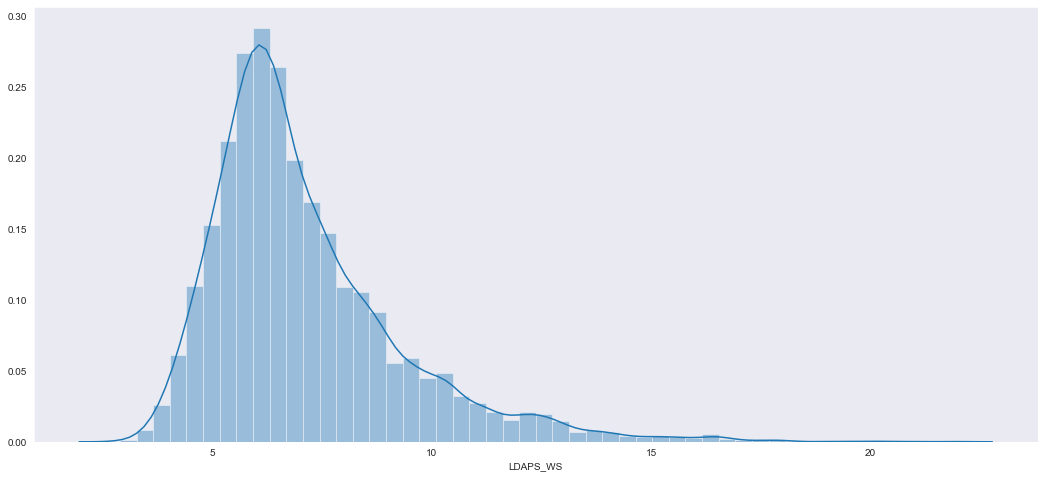

In [17]:
plt.figure(figsize=(18,8))
sb.set_style('dark')
sb.distplot(data['LDAPS_WS'])
print(data['LDAPS_WS'].value_counts())

31.292903    1
52.898936    1
18.794811    1
58.594891    1
35.230479    1
            ..
61.306949    1
99.205233    1
10.853051    1
20.780082    1
48.865865    1
Name: LDAPS_LH, Length: 7588, dtype: int64


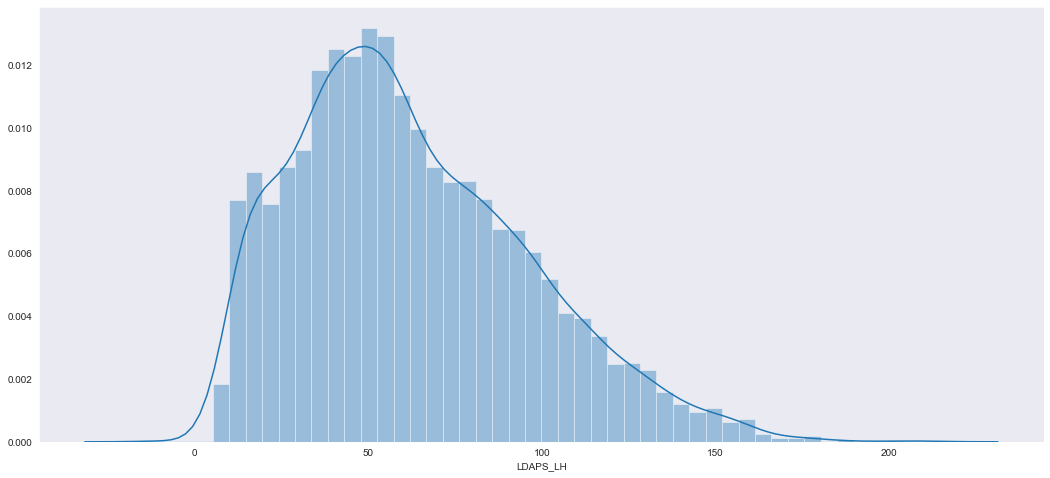

In [18]:
plt.figure(figsize=(18,8))
sb.set_style('dark')
sb.distplot(data['LDAPS_LH'])
print(data['LDAPS_LH'].value_counts())

5818.526855    5
5793.305176    5
5319.623535    5
5646.600098    5
5356.832520    5
              ..
4405.562500    1
4430.538574    1
4411.375977    1
4418.823730    1
4463.118652    1
Name: Solar radiation, Length: 1575, dtype: int64


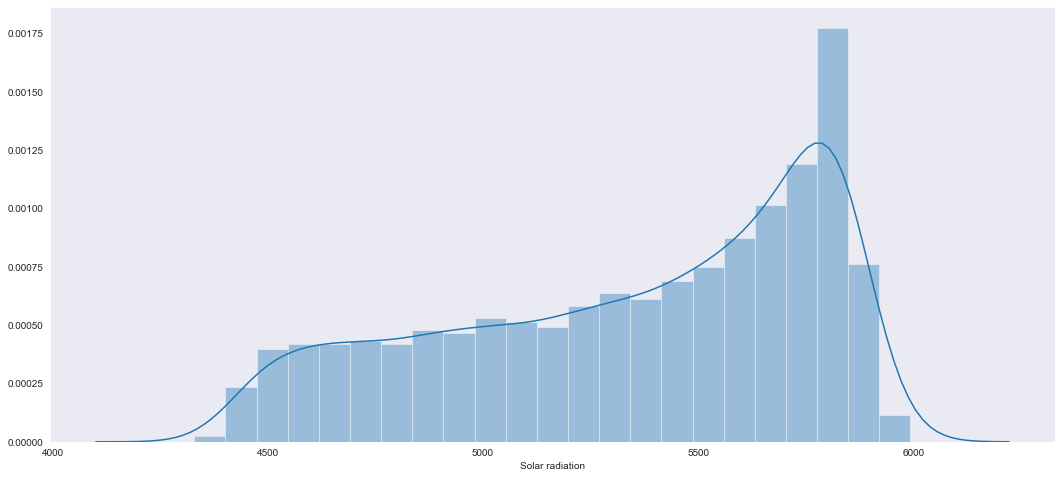

In [19]:
plt.figure(figsize=(18,8))
sb.set_style('dark')
sb.distplot(data['Solar radiation'])
print(data['Solar radiation'].value_counts())

Bivariate PLot

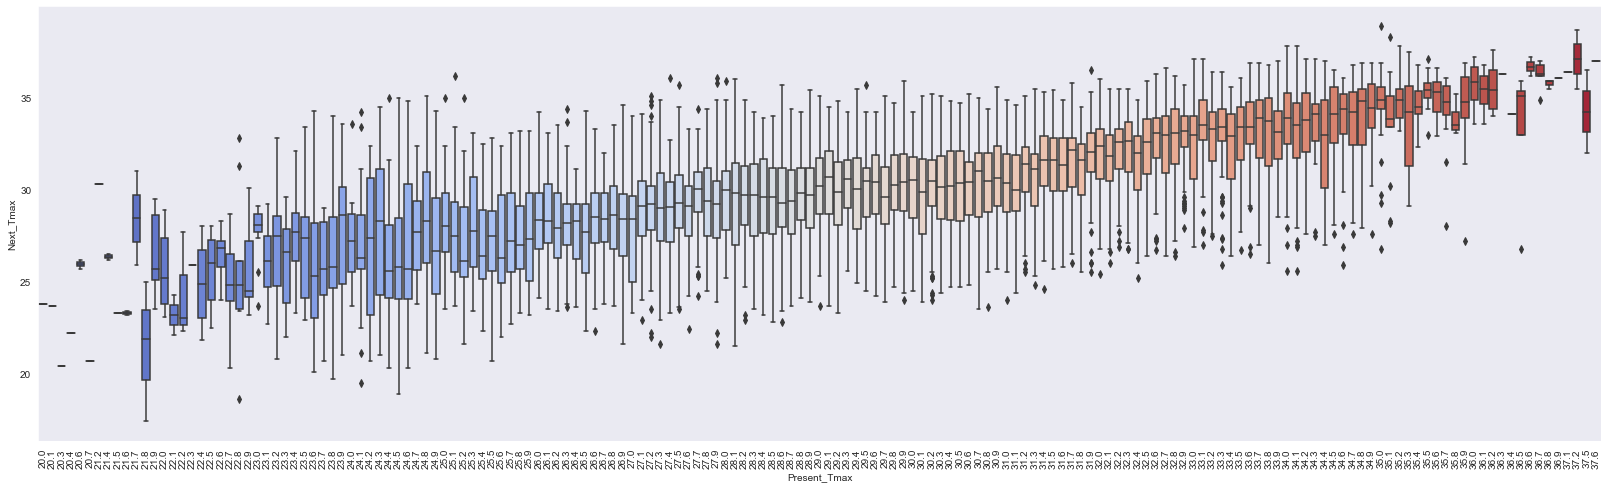

In [20]:
plt.figure(figsize=(28,8))
plt.xticks(rotation=90)
sb.boxplot(x='Present_Tmax',y='Next_Tmax',data=data, palette='coolwarm')

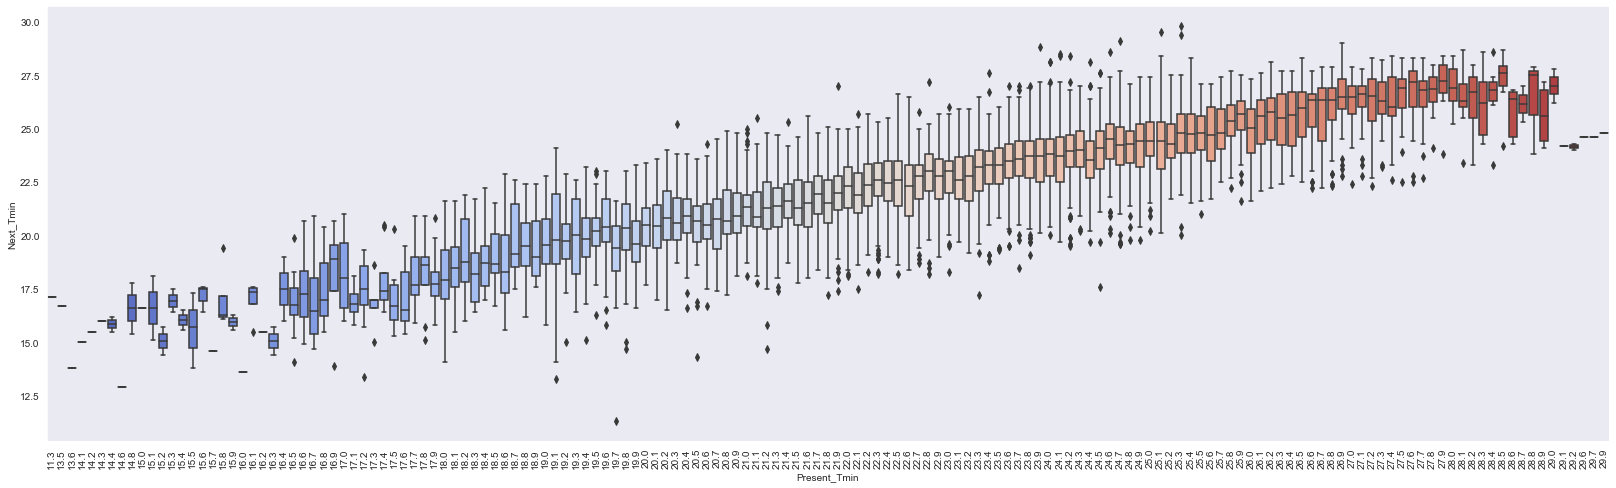

In [21]:
plt.figure(figsize=(28,8))
plt.xticks(rotation=90)
sb.boxplot(x='Present_Tmin',y='Next_Tmin',data=data, palette='coolwarm')

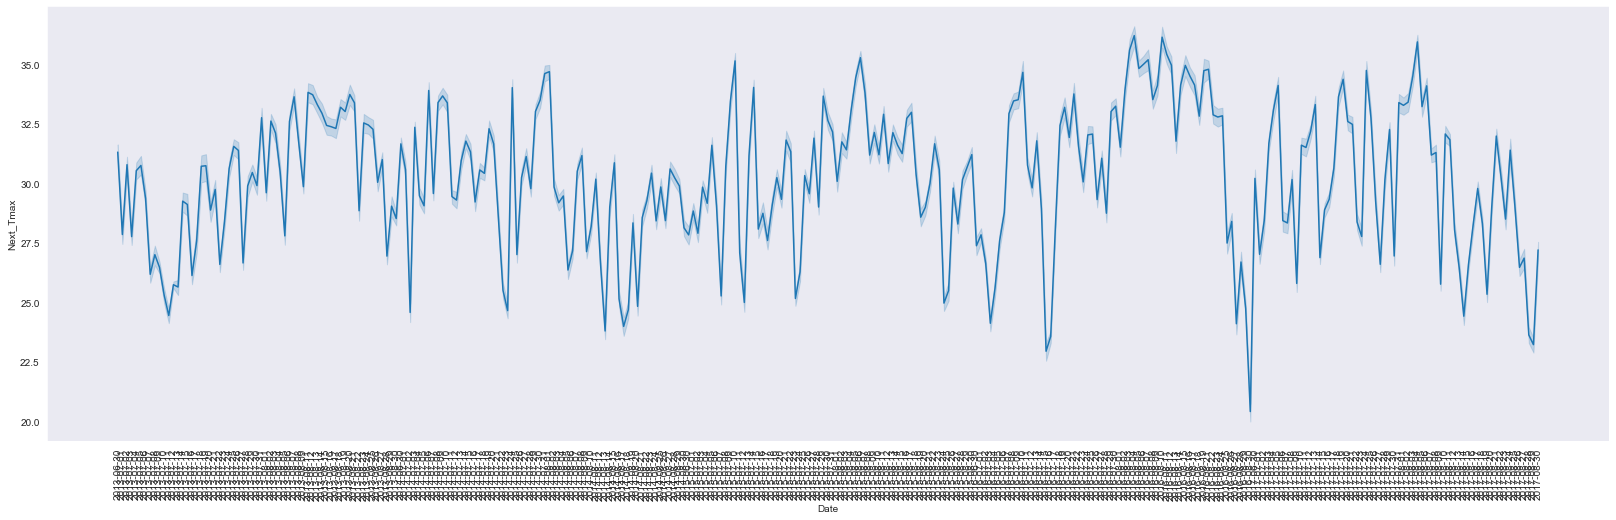

In [22]:
plt.figure(figsize=(28,8))
plt.xticks(rotation=90)
sb.lineplot(x='Date',y='Next_Tmax',data=data)

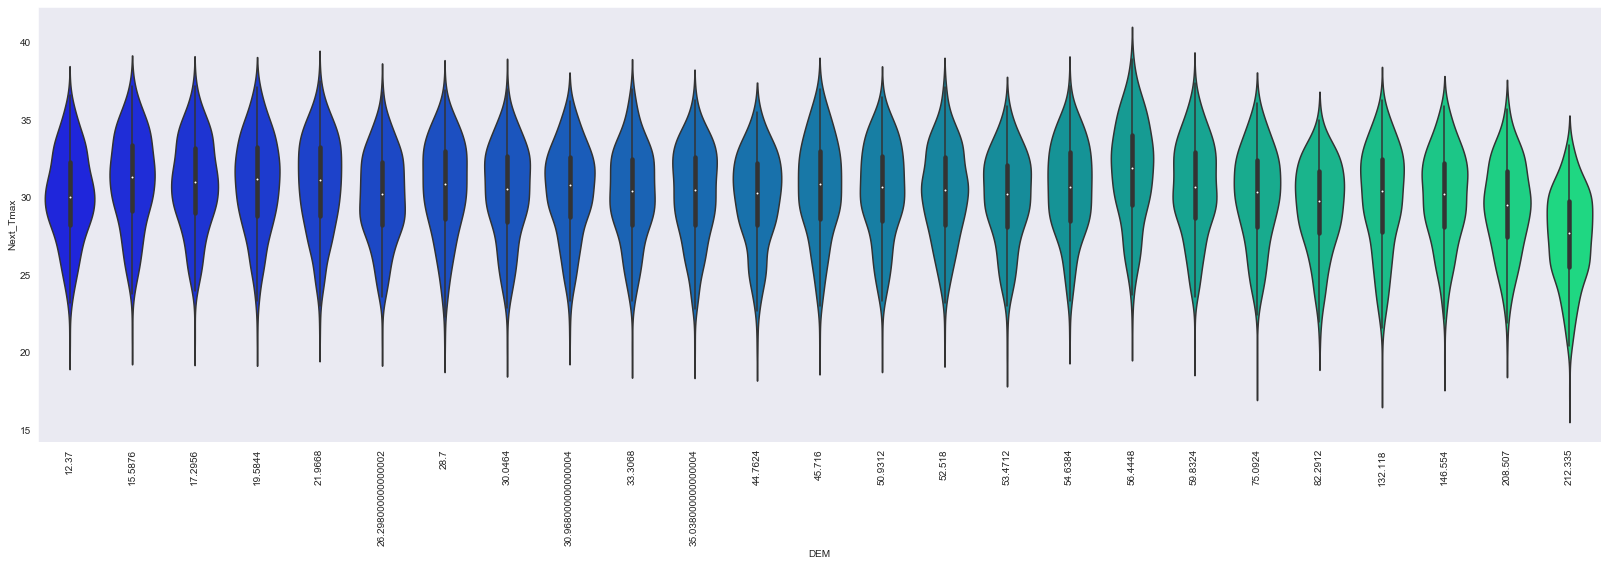

In [23]:
plt.figure(figsize=(28,8))
plt.xticks(rotation=90)
sb.violinplot(x='DEM',y='Next_Tmax',data=data,palette='winter')

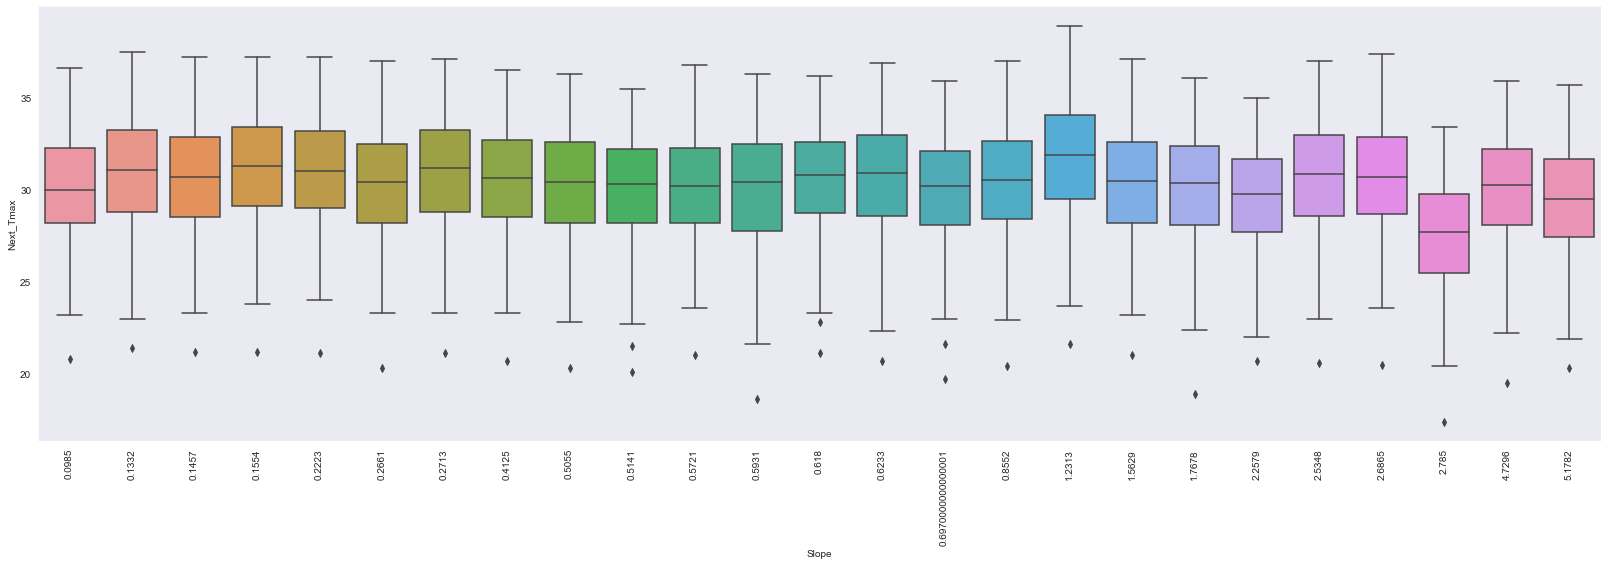

In [24]:
plt.figure(figsize=(28,8))
plt.xticks(rotation=90)
sb.boxplot(x='Slope',y='Next_Tmax',data=data)

# Data Preprocessing

In [25]:
data.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [26]:
#spliting Date into required parts 
#converting into float

data['day']=data['Date'].str.split('-').str[2]
data['month']=data['Date'].str.split('-').str[1]
data['year']=data['Date'].str.split('-').str[0]
data['day']=data['day'].astype(float)
data['month']=data['month'].astype(float)
data['year']=data['year'].astype(float)
datafin=data.drop(['Date','station'],axis=1)

In [27]:
datafin

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,23.1,17.8,24.688997,78.261383,27.812697,18.303014,6.603253,9.614074,0.052902,0.030169,...,37.5507,127.040,26.2980,0.5721,4456.024414,27.6,17.7,30.0,8.0,2017.0
7746,22.5,17.4,30.094858,83.690018,26.704905,17.814038,5.768083,82.146707,0.066461,0.024518,...,37.5102,127.086,21.9668,0.1332,4441.803711,28.0,17.1,30.0,8.0,2017.0
7747,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,...,37.5372,126.891,15.5876,0.1554,4443.313965,28.3,18.1,30.0,8.0,2017.0
7748,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,...,37.5237,126.909,17.2956,0.2223,4438.373535,28.6,18.8,30.0,8.0,2017.0


In [28]:
#data types after conversion

datafin.dtypes

Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
day                 float64
month               float64
year                float64
dtype: object

In [29]:
# the Correlation between the different variables

datafin.corr()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,day,month,year
Present_Tmax,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,-0.216976,...,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048,-0.151982,0.147358,0.056002
Present_Tmin,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,0.090038,...,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975,-0.114294,0.084047,0.037457
LDAPS_RHmin,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,0.744774,...,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249,-0.060702,-0.190674,-0.002147
LDAPS_RHmax,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,0.390620,...,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415,-0.014242,-0.117317,-0.144286
LDAPS_Tmax_lapse,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,-0.525380,...,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963,-0.160191,0.096915,0.020308
LDAPS_Tmin_lapse,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,0.046537,...,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513,-0.171284,0.023412,-0.000564
LDAPS_WS,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,0.257226,...,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021,-0.040088,-0.113617,-0.114114
LDAPS_LH,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,-0.265382,...,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392,-0.019588,0.060947,0.055898
LDAPS_CC1,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,0.779510,...,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877,-0.024234,-0.212477,-0.066233
LDAPS_CC2,-0.216976,0.090038,0.744774,0.390620,-0.525380,0.046537,0.257226,-0.265382,0.779510,1.000000,...,-0.002642,-0.004757,-0.016249,-0.021173,0.169346,-0.498295,0.030358,-0.008691,-0.165355,-0.045027


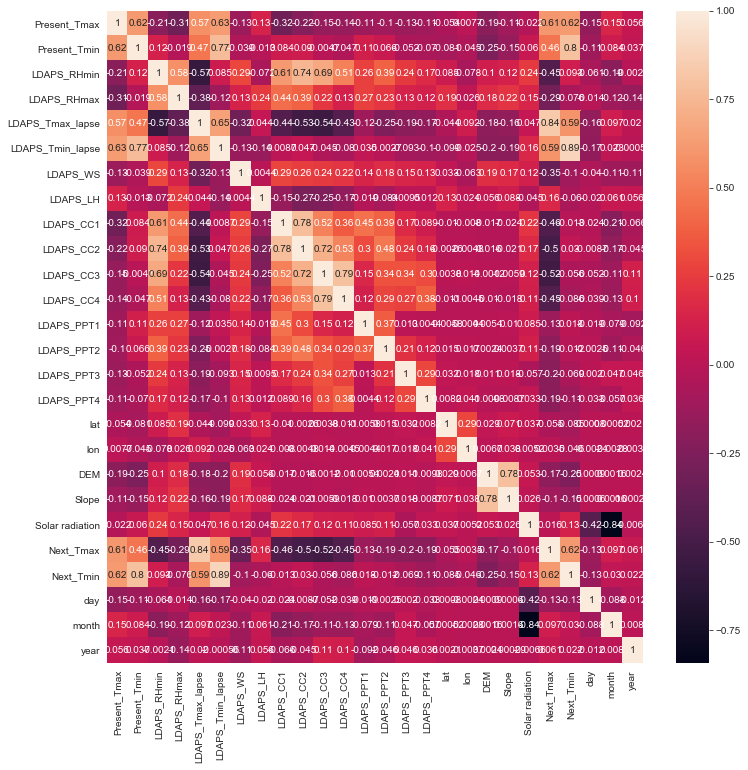

In [30]:
# This heatmap shows the Correlation between the different variables

plt.figure(figsize=(12,12))
sb.heatmap(datafin.corr(),annot=True)

# Model Building


Assigning Independent and Dependent Variables

Here x is considered as Independent variable

y is Dependent Variables

# Modeling For Temp-Max

In [31]:
x=datafin.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=datafin['Next_Tmax']

In [32]:
#Getting the shape of the x and variables

print(x.shape)
print(y.shape)

(7588, 24)
(7588,)


In [33]:
#Preprocessing the data withStandardScaler

sc = StandardScaler()
x= sc.fit_transform(x)

We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=100)

Finding metric data , cross validation and prediction

Using for loop to find n number of model buidling at once

In this we are also finding mean_absolute_error,mean_squared_error, root_mean_square, r2_score

Along with metrics we are finding cross validation and prediction

In [35]:
model=[RandomForestRegressor(),DecisionTreeRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

In [36]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    pred=m.predict(x_test)
    
    print('Finding mean_absolute_error,mean_squared_error, root_mean_square and r2_score')
    print()
    print('MAE :',metrics.mean_absolute_error(y_test,pred))
    print('MSE :',metrics.mean_squared_error(y_test,pred))
    print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print('r2 score :',metrics.r2_score(y_test, pred))
    print('-'*100)
    print('cross validation and cross prediction')
    #cross valiadtion
    print()
    score=cross_val_score(m,x,y,cv=5)
    print('mean score :',score.mean())
    print('STD score:',score.std())
    print()
    #cross prediction
    predscore=cross_val_predict(m,x,y,cv=5)
    print("cross prediction",predscore)
    print()
    print('*'*100)


Finding mean_absolute_error,mean_squared_error, root_mean_square and r2_score

MAE : 0.7001544544016866
MSE : 0.8807193879810219
RMSE : 0.938466508715693
r2 score : 0.9098738610709752
----------------------------------------------------------------------------------------------------
cross validation and cross prediction

mean score : 0.6988039371926656
STD score: 0.06472948524727332

cross prediction [29.955 30.645 31.698 ... 28.687 28.725 29.033]

****************************************************************************************************
Finding mean_absolute_error,mean_squared_error, root_mean_square and r2_score

MAE : 1.034370057986294
MSE : 2.0334211913547704
RMSE : 1.4259807822529624
r2 score : 0.7919151056576806
----------------------------------------------------------------------------------------------------
cross validation and cross prediction

mean score : 0.45284489855115007
STD score: 0.08650633108203223

cross prediction [30.  29.2 33.5 ... 28.4 28.2 28.5]

**

# GridSearchCV For Next Day T-max

In [37]:
#gridsearch for RandomForestRegressor

param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True],
            }
rfr=RandomForestRegressor()
gridscv = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=-1, cv=5)
gridscv.fit(x_train, y_train)
print(gridscv)
print('best score :',gridscv.best_score_)
print('best params :',gridscv.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [38]:
# Save the best model with the help of joblib and pickle

joblib.dump(rfr,'temp-max.pkl')

['temp-max.pkl']

# Modeling foe Temp-Min

In [39]:
x=datafin.drop(['Next_Tmax','Next_Tmin'],axis=1)
y=datafin['Next_Tmin']

In [40]:
#Getting the shape of the x and variables

print(x.shape)
print(y.shape)

(7588, 24)
(7588,)


In [41]:
#Preprocessing the data withStandardScaler

sc = StandardScaler()
x= sc.fit_transform(x)


We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=100)

Finding metric data , cross validation and prediction

Using for loop to find n number of model buidling at once

In this we are also finding mean_absolute_error,mean_squared_error, root_mean_square, r2_score

Along with metrics we are finding cross validation and prediction

In [43]:
model=[RandomForestRegressor(),DecisionTreeRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

In [44]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_test,y_test)
    pred=m.predict(x_test)
    
    print('Finding mean_absolute_error,mean_squared_error, root_mean_square and r2_score')
    print()
    print('MAE :',metrics.mean_absolute_error(y_test,pred))
    print('MSE :',metrics.mean_squared_error(y_test,pred))
    print('RMSE :',np.sqrt(metrics.mean_squared_error(y_test, pred)))
    print('r2 score :',metrics.r2_score(y_test, pred))
    print('-'*100)
    print('cross validation and cross prediction')
    #cross valiadtion
    print()
    score=cross_val_score(m,x,y,cv=5)
    print('mean score :',score.mean())
    print('STD score:',score.std())
    print()
    #cross prediction
    predscore=cross_val_predict(m,x,y,cv=5)
    print("cross prediction",predscore)
    print()
    print('*'*100)

Finding mean_absolute_error,mean_squared_error, root_mean_square and r2_score

MAE : 0.5766752767527675
MSE : 0.5738785108065366
RMSE : 0.7575476954004524
r2 score : 0.9078447335979251
----------------------------------------------------------------------------------------------------
cross validation and cross prediction

mean score : 0.7776985406499458
STD score: 0.09100845269985819

cross prediction [21.704 22.864 23.721 ... 17.287 17.815 17.422]

****************************************************************************************************
Finding mean_absolute_error,mean_squared_error, root_mean_square and r2_score

MAE : 0.8433842909857671
MSE : 1.3620400632577756
RMSE : 1.1670647211092346
r2 score : 0.7812792036708031
----------------------------------------------------------------------------------------------------
cross validation and cross prediction

mean score : 0.5625947657701931
STD score: 0.14718737736685975

cross prediction [21.5 23.4 24.5 ... 17.6 17.6 17.6]

*

# GridSearchCV For Next Day T-min

In [45]:
#gridsearch for RandomForestRegressor

param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True],
            }
rfr=RandomForestRegressor()
gridscv = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=-1, cv=5)
gridscv.fit(x_train, y_train)
print(gridscv)
print('best score :',gridscv.best_score_)
print('best params :',gridscv.best_params_)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

# Saving the model with joblib

In [46]:
# Save the best model with the help of joblib and pickle

joblib.dump(rfr,'temp-min.pkl')

['temp-min.pkl']

# conclusion

Importing the required libraries Analysing the dataset by check various aspects..

Data Visualization is done by Univariate bivariate and multivariate to get a better insight of the data..

Exploratory data analysis and Data Preprocessing is used to prepare the data for modeling

data is tarined and tested using different Models ,this includes working with metrics and cross validation,gridsearch rtc

Saving the best model with joblib